# Comparaison du calcul de l'ETP journalière à la donnée correspondante

## Définition des paramètres

In [1]:
# Définition de la station de référence
REF_STATION_NAME = 'La Petite Claye'

# Météo-France API
METEOFRANCE_API = 'DPClim'

# Période des données
DATE_DEB_PERIODE = '2024-01-01T00:00:00Z'
DATE_FIN_PERIODE = '2024-12-31T23:00:00Z'

# Fréquence des données climatiques
METEOFRANCE_FREQUENCE_ARR = ['quotidienne', 'quotidienne_estimee']

# Plus proches voisins retenus
ID_DEPARTEMENTS = [35, 50]
NN_NOMBRE = 9

## Lecture des données météorologiques pour la station de référence

In [2]:
import meteofrance

# Initialisation d'un client pour configurer l'accès aux données Météo-France même si l'API n'est pas utilisée
client = meteofrance.Client(METEOFRANCE_API)

In [8]:
import pandas as pd

# Lecture des données de la station de référence pour les différents choix des plus proches voisins
df_meteo_ref_dict = {}
for param in METEOFRANCE_FREQUENCE_ARR:
    filepath_donnee = meteofrance.get_filepath_donnee_periode(
        client, DATE_DEB_PERIODE, DATE_FIN_PERIODE,
        frequence=param,
        id_departements=ID_DEPARTEMENTS, nn_nombre=NN_NOMBRE)
    
    str_ref_station_name = REF_STATION_NAME.lower().replace(' ', '')
    filepath_donnee_ref = filepath_donnee.with_name(
        filepath_donnee.stem + '_' + str_ref_station_name + filepath_donnee.suffix)

    df_meteo_ref = pd.read_csv(
        filepath_donnee_ref, parse_dates=[client.time_label],
        index_col=client.time_label)
    # try:
    df_meteo_ref = meteofrance.renommer_variables(
        client, df_meteo_ref, param.split('_')[0])

    df_meteo_ref_dict[param] = df_meteo_ref.stack(future_stack=True)

df_meteo_ref_comp = pd.DataFrame(df_meteo_ref_dict).stack(
    future_stack=True).unstack(0).transpose()

df_meteo_ref_comp

etp                     humidite_relative  \
                          quotidienne quotidienne_estimee       quotidienne   
DATE                                                                          
2024-01-01 00:00:00+00:00    0.994286            1.096184               NaN   
2024-01-02 00:00:00+00:00    1.100415            0.668039               NaN   
2024-01-03 00:00:00+00:00    1.658711            1.184431               NaN   
2024-01-04 00:00:00+00:00    1.009146            1.108996               NaN   
2024-01-05 00:00:00+00:00    0.739796            0.592415               NaN   
...                               ...                 ...               ...   
2024-12-27 00:00:00+00:00    0.209624            0.282990               NaN   
2024-12-28 00:00:00+00:00    0.113663            0.434211               NaN   
2024-12-29 00:00:00+00:00    0.004411            0.440755               NaN   
2024-12-30 00:00:00+00:00    0.065607            0.613813               NaN   
2024-12-31 00:00:00+00:00    0.245128            0.449884               NaN   

                                              precipitation  \
                          quotidienne_estimee   quotidienne   
DATE                                                          
2024-01-01 00:00:00+00:00           81.725519     11.668512   
2024-01-02 00:00:00+00:00           83.444514      9.570334   
2024-01-03 00:00:00+00:00           76.337075      1.873964   
2024-01-04 00:00:00+00:00           83.338722      1.475322   
2024-01-05 00:00:00+00:00           86.808396      6.142925   
...                                       ...           ...   
2024-12-27 00:00:00+00:00           93.943457      0.116365   
2024-12-28 00:00:00+00:00           96.357934      0.124725   
2024-12-29 00:00:00+00:00           95.813597      0.000000   
2024-12-30 00:00:00+00:00           93.671877      0.130236   
2024-12-31 00:00:00+00:00           94.700459      0.156621   

                                              rayonnement_global  \
                          quotidienne_estimee        quotidienne   
DATE                                                               
2024-01-01 00:00:00+00:00            5.718468                NaN   
2024-01-02 00:00:00+00:00           15.152207                NaN   
2024-01-03 00:00:00+00:00            2.233774                NaN   
2024-01-04 00:00:00+00:00            1.205447                NaN   
2024-01-05 00:00:00+00:00            3.519178                NaN   
...                                       ...                ...   
2024-12-27 00:00:00+00:00            0.000000                NaN   
2024-12-28 00:00:00+00:00            0.241090                NaN   
2024-12-29 00:00:00+00:00            0.000000                NaN   
2024-12-30 00:00:00+00:00            0.014467                NaN   
2024-12-31 00:00:00+00:00            0.272389                NaN   

                                              temperature_2m  \
                          quotidienne_estimee    quotidienne   
DATE                                                           
2024-01-01 00:00:00+00:00               335.0            NaN   
2024-01-02 00:00:00+00:00               161.0            NaN   
2024-01-03 00:00:00+00:00               383.0            NaN   
2024-01-04 00:00:00+00:00               190.0            NaN   
2024-01-05 00:00:00+00:00               437.0            NaN   
...                                       ...            ...   
2024-12-27 00:00:00+00:00               163.0            NaN   
2024-12-28 00:00:00+00:00                90.0            NaN   
2024-12-29 00:00:00+00:00                87.0            NaN   
2024-12-30 00:00:00+00:00               135.0            NaN   
2024-12-31 00:00:00+00:00               252.0            NaN   

                                              vitesse_vent_10m  \
                          quotidienne_estimee      quotidienne   
DATE                                                          

## Comparaison des séries temporelles

### Pour toute la période

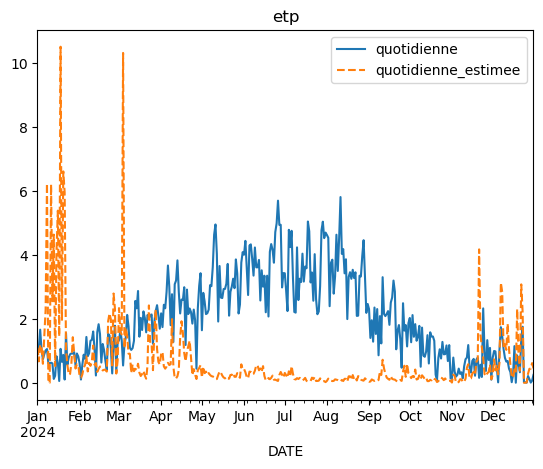

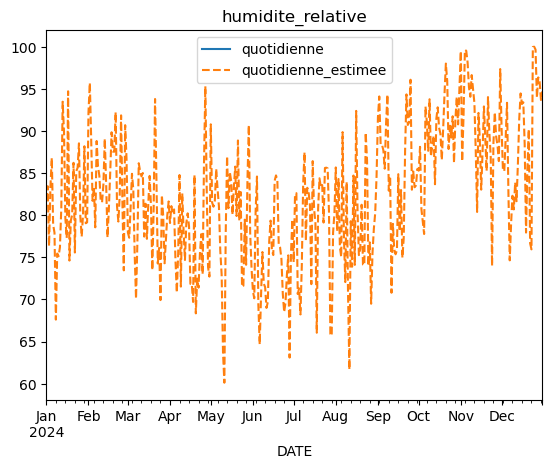

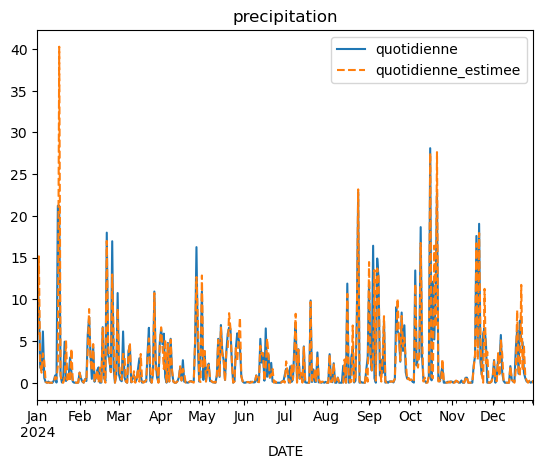

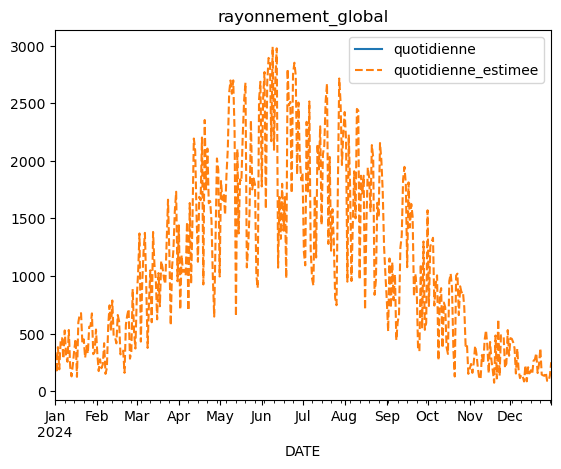

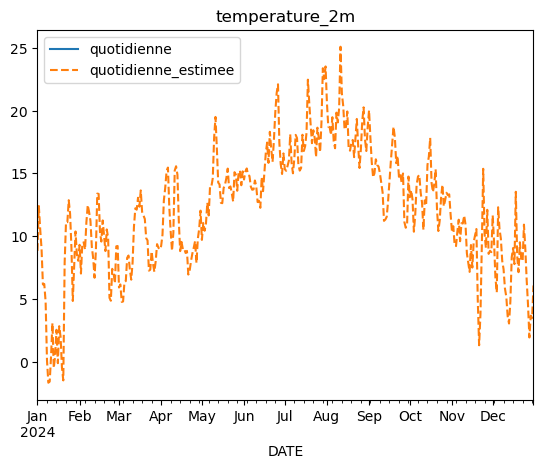

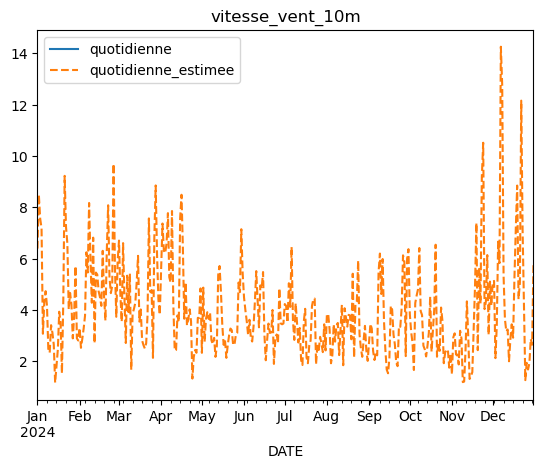

In [4]:
# Plot full time series
style = ['-', '--']
for variable in df_meteo_ref_comp.columns.levels[0]:
    df_meteo_ref_comp[variable].plot(style=style, title=variable)

### Pour l'été

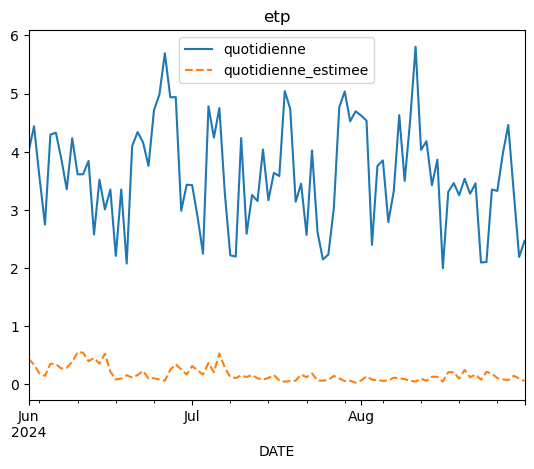

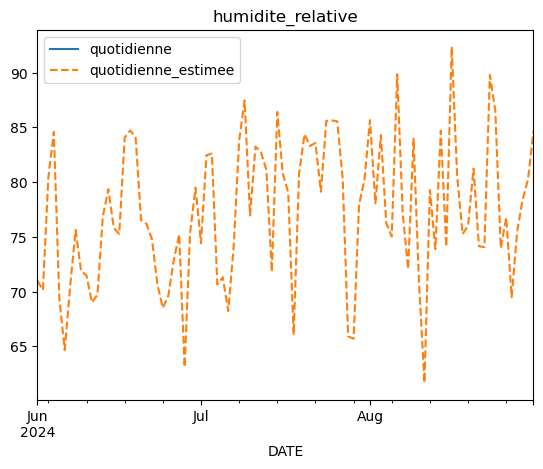

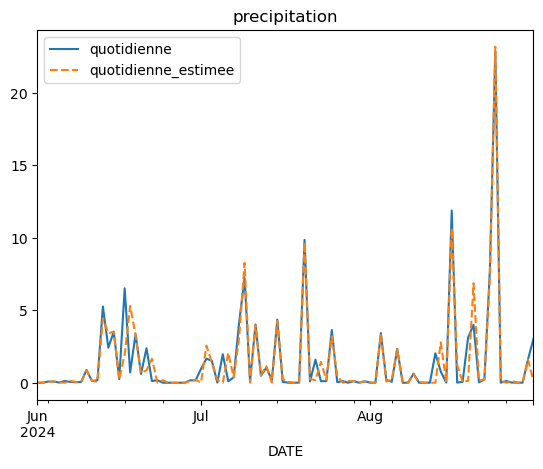

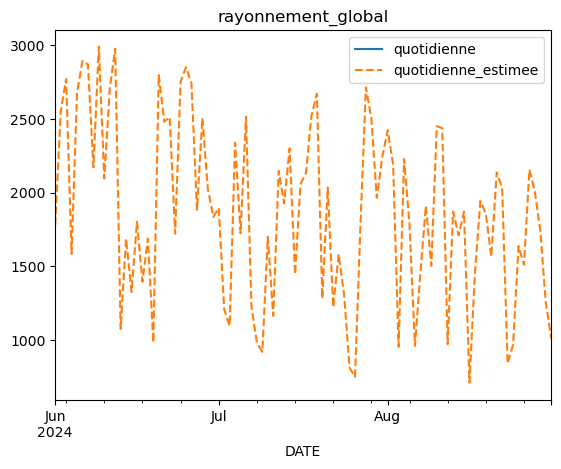

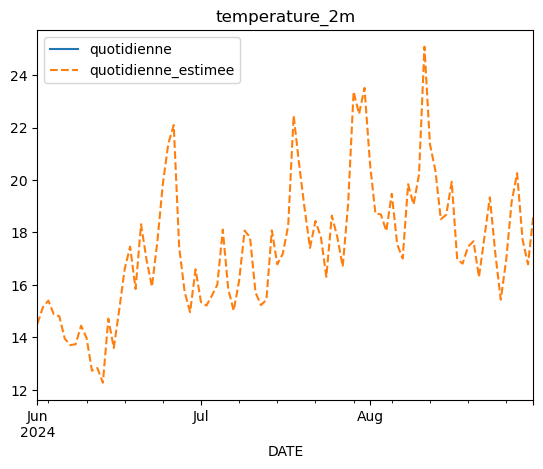

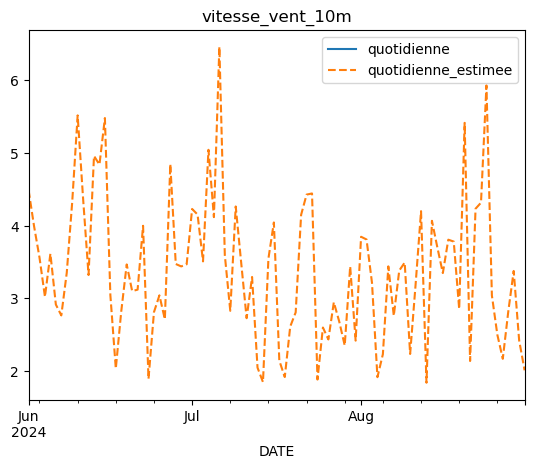

In [5]:
# Plot summer time series
SUMMER_MONTHS = [6, 7, 8]

year = df_meteo_ref_comp.index.year[0]
df_meteo_ref_comp_summer = pd.concat([df_meteo_ref_comp.loc[f"{year}-{month}"]
                                      for month in SUMMER_MONTHS], axis='index')

for variable in df_meteo_ref_comp.columns.levels[0]:
    df_meteo_ref_comp_summer[variable].plot(style=style, title=variable)